In [53]:
# importing libraries
import numpy as np
import pandas as pd

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
# import csv file
df = pd.read_csv('crops_data_nonzero_protein.csv')
df.head()
# plant names
names = df['Name']
protein = df['Protein']
# selecting only numeric features for the model
feature = df[['Temp_1', 'Temp_2', 'Temp_3', 'Temp_4']]
feature.head()

,Temp_1,Temp_2,Temp_3,Temp_4
0,20,30,12,35
1,22,30,16,36
2,20,30,10,35
3,24,32,10,40
4,20,32,7,42


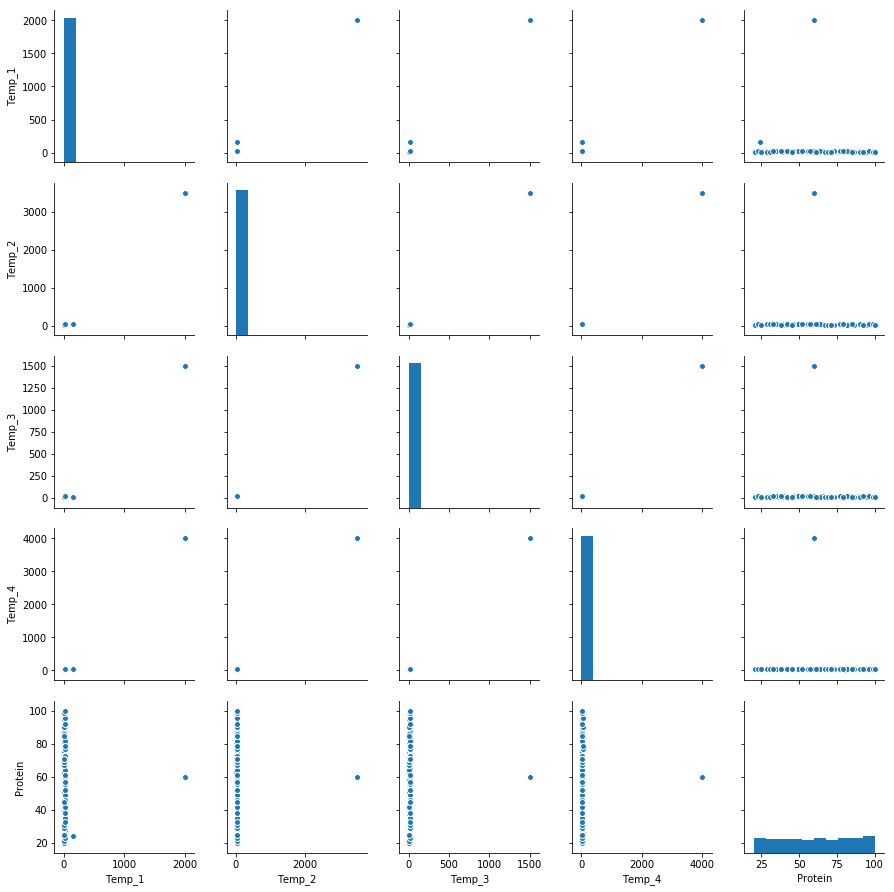

In [56]:
# visualize the data_set
sns.pairplot(df)
plt.show()


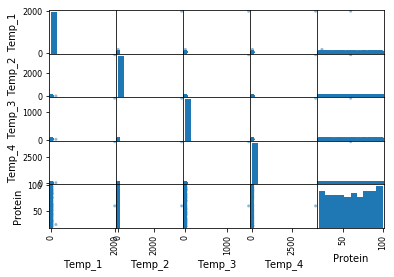

In [57]:
pd.plotting.scatter_matrix(df)
plt.show()

In [58]:
# import TSNE estimator
from sklearn.manifold import TSNE

In [59]:
# convert data to ndarray for TSNE
X = np.array(feature)

In [60]:
X_embedded = TSNE(n_components=3).fit_transform(X)

In [61]:
X_embedded.shape

(1973, 3)

In [62]:
# plot the results in 2-D
# plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=1,color = 'red')
# plt.show()

In [63]:
# plotly plots
import plotly
plotly.__version__

'2.3.0'

In [64]:
# creating plotly graph
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='shafay07', api_key='ttxl6ah6pyBEnsfZG394')

In [65]:
# Create a trace for 2-d
trace = go.Scatter(
    x = X_embedded[:,0],
    y = X_embedded[:,1],
    mode = 'markers',
)

data = [trace]

# Plot and embed in ipython notebook!
plot_url = py.plot(data, filename='t-sne_data_crops')

In [71]:
# 3-D plot
trace2 = go.Scatter3d(
    x = X_embedded[:,0],
    y = X_embedded[:,1],
    z = X_embedded[:,2], #target values
    mode='markers+text',
    hovertext=names,
    marker=dict(
        size=12,
        color = protein, # set color to an array/list of desired values
        colorscale='Viridis', # choose a colorscale
        opacity=0.5
    )
)

data = [trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter_crops_nonzero_protein')